In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [ ]:
lyric_file_raw = pd.read_csv('all_songs_data.csv')

In [ ]:
lyric_file_raw.size
lyric_file_raw.columns

In [ ]:
lyric_file = lyric_file_raw.dropna(subset=['Release Date', "Lyrics"])

In [ ]:

def calc_word_repitition(lyrics):
  lyrics_string = str(lyrics)
  word_set = set(lyrics_string.split(" "))
  uniuqe_words = len(word_set)
  total_words = len(lyrics_string.split())
  return uniuqe_words/total_words

def uniuqe_words(song):
  lyrics_string = str(song)
  word_set = set(lyrics_string.split(" "))
  return word_set

In [ ]:
rep_over_time = pd.DataFrame(columns=['Release Date', 'Repitition'])
rep_over_time['Release Date'] = lyric_file['Release Date'].str[:4].astype(int)
rep_over_time['Repitition'] = lyric_file['Lyrics'].apply(calc_word_repitition)
#rep_over_time = rep_over_time[rep_over_time["Release Date"] >= 1940]

(0.0, 0.5)

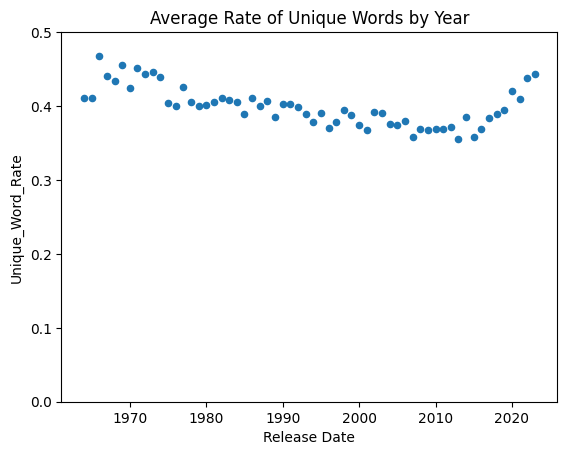

In [ ]:
rep_by_year = rep_over_time.groupby('Release Date').agg(
    Unique_Word_Rate=('Repitition', 'mean'),
    Songs_From_Year=('Release Date', 'size')
).reset_index()

rep_by_year_cleaned = rep_by_year[rep_by_year["Songs_From_Year"] >= 30] #Only considers years with a sample size > 30
rep_by_year_cleaned.plot(x="Release Date", y="Unique_Word_Rate", kind="scatter", title="Average Rate of Unique Words by Year").set_ylim([0, 0.5])



<Axes: xlabel='Release Date', ylabel='Unique_Word_Rate'>

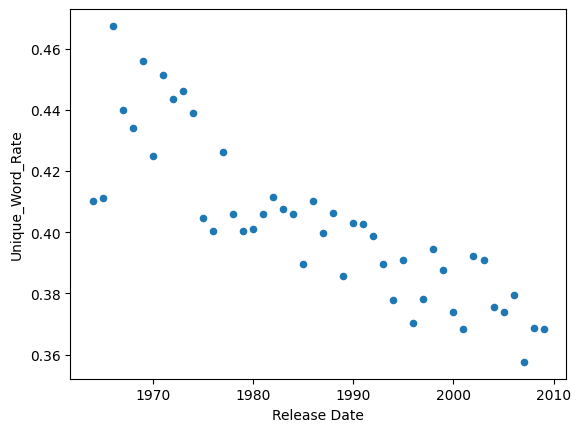

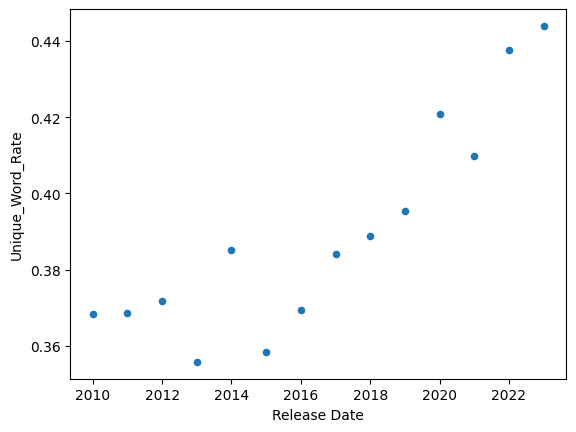

In [ ]:
repitition_to_2000 = rep_by_year_cleaned[rep_by_year_cleaned["Release Date"] < 2010]
repitition_to_2000.plot(x="Release Date", y="Unique_Word_Rate", kind="scatter")

repitition_after_2000 = rep_by_year_cleaned[rep_by_year_cleaned["Release Date"] >= 2010]
repitition_after_2000.plot(x="Release Date", y="Unique_Word_Rate", kind="scatter")

In [ ]:
#LinearRegression
#data is list of tuples
def calc_loss(m, b, data):
    error = 0
    for i in range(len(data)):
        x = data[i][0]
        y = data[i][1]
        error += (y-(m*x+b)) ** 2 #differnce between actual data and current model
    error = error / float(len(data)) #mean squared error
    return error

def r_squared(mse):
  rmse = sqrt(mse)
  r2 = 1- (rmse / mse)
  return r2


def gradient_descent(new_m, new_b, data, learning_rate):
    m_gradient = 0
    b_gradient = 0
    length = len(data)

    for i in range(length):
        x = data[i][0]
        y = data[i][1]
        #print(x,y)
        m_gradient += -(2/length) * x * (y- (new_m * x + new_b))
        b_gradient += -(2/length) * (y- (new_m * x + new_b))
        #print(m_gradient, b_gradient)

    m = new_m - m_gradient * learning_rate
    b = new_b - b_gradient * learning_rate

    #print(m,b)

    return m,b


def LinReg(learning_rate, epochs, data):
    #m= (data[0][1]-data[-1][0])/(data[0][1]-data[-1][1])
    #m = (data[-1][1] - data[0][1]) / (data[-1][0] - data[0][0])
    m = 62/44
    print(m)
    b=0
    for i in range(epochs):
        #print(m,b)
        if pd.isna(gradient_descent(m, b, data, learning_rate)):
          print("breaking")
          break
        m, b = gradient_descent(m, b, data, learning_rate)
       # print(m,b)
    return m, b

[(4, 41.02643864216935), (5, 41.12547391022095), (6, 46.74276540147927), (7, 44.009473530315766), (8, 43.414412815202276), (9, 45.582030820617526), (10, 42.47454483036566), (11, 45.12346919719351), (12, 44.3656477719417), (13, 44.61914323309368), (14, 43.89793059540526), (15, 40.470051058870595), (16, 40.03971764396951), (17, 42.621874598965455), (18, 40.60046005643892), (19, 40.04887287731903), (20, 40.10896133239939), (21, 40.58483439615837), (22, 41.13624728399924), (23, 40.76549853443087), (24, 40.59483066538486), (25, 38.9644570356266), (26, 41.027446859717514), (27, 39.98116887915085), (28, 40.63081931068647), (29, 38.55254492262646), (30, 40.29076256211923), (31, 40.252049626926016), (32, 39.8671180249066), (33, 38.974701608950966), (34, 37.789153501493075), (35, 39.09140976357739), (36, 37.046426906238885), (37, 37.81659080768377), (38, 39.457762006703625), (39, 38.74970599837051), (40, 37.37767116353826), (41, 36.81949051839914), (42, 39.22290556543298), (43, 39.09943411402193

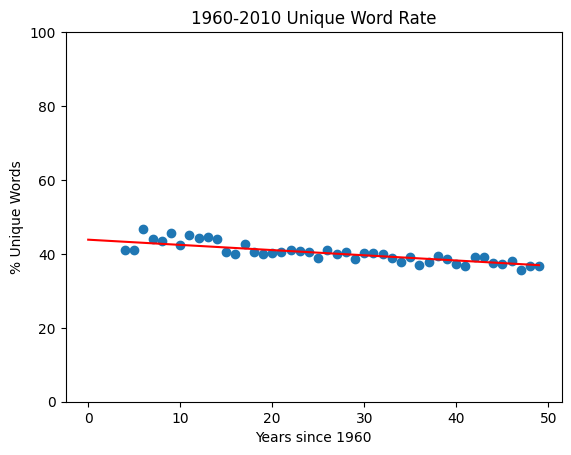

Mean Squared Error: 1.883172962021854     r squared: 0.2712897221036956


In [ ]:
initial_data = list(repitition_to_2000.itertuples(index=False, name=None))
new_data = []
for point in initial_data:
  new_data.append(((int(point[0])-1960), point[1]*100))

x_vals, y_vals = zip(*new_data)
plt.scatter(x_vals, y_vals)

print(new_data)
m,b = LinReg(0.001, 10000, new_data)

print(f"y={m}x+{b}")

plt.plot(list(range(0,50)), [m*x+b for x in range(0,50)], color = "red")
plt.xlabel('Years since 1960')
plt.ylabel('% Unique Words')
plt.title("1960-2010 Unique Word Rate")

mse = calc_loss(m, b, new_data)
rsquared = r_squared(mse)

plt.ylim([0, 100])
plt.show()



print(f"Mean Squared Error: {calc_loss(m, b, new_data)}     r squared: {rsquared}")


[(0, 36.846425793699794), (1, 36.87054999137277), (2, 37.17586643863217), (3, 35.58022889021972), (4, 38.527675826189665), (5, 35.82881892336735), (6, 36.95382277317159), (7, 38.41677109039111), (8, 38.89082194339758), (9, 39.52899766777428), (10, 42.089699773933624), (11, 40.97501768730169), (12, 43.771189213468176), (13, 44.39681229755749)]
1.4090909090909092
y=0.5922555604450278x+35.1398173078555


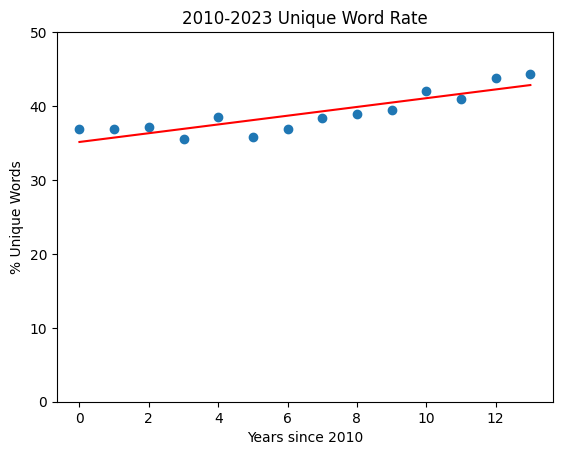

Mean Squared Error: 1.773484186260798     r squared: 0.24909267672009772


In [ ]:
initial_data = list(repitition_after_2000.itertuples(index=False, name=None))
new_data = []
for point in initial_data:
  #print(point)
  new_data.append(((int(point[0])-2010), point[1]*100))

#new_data = sorted(new_data, key=lambda x: x[0])

x_vals, y_vals = zip(*new_data)
plt.scatter(x_vals, y_vals)

print(new_data)
m,b = LinReg(0.01, 10000, new_data)

print(f"y={m}x+{b}")

plt.plot(list(range(0,14)), [m*x+b for x in range(0,14)], color = "red")
plt.xlabel('Years since 2010')
plt.ylabel('% Unique Words')
plt.title("2010-2023 Unique Word Rate")
mse = calc_loss(m, b, new_data)
rsquared = r_squared(mse)

#plt.text(1000,10000,f'Mean Squared Error: {calc_loss(m, b, new_data)}     r squared: {rsquared}', ha='center')
plt.ylim([0, 50])
plt.show()



print(f"Mean Squared Error: {calc_loss(m, b, new_data)}     r squared: {rsquared}")